In [ ]:
  #!pip install nltk scipy numpy matplotlib scikit-learn gensim
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'pathtodirectory/rotten_tomatoes_critic_reviews_from_kaggle.csv'
review_df = pd.read_csv(path)
review_df.sample(5)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
1012755,m/the_seagull_2018,Hoai-Tran Bui,False,Slashfilm,Rotten,10-Jun,5/2/2018,"""There are spells cast by this lake,"" Dr. Dorn..."
164524,m/batman_vs_teenage_mutant_ninja_turtles,Felix Vasquez Jr.,False,Cinema Crazed,Fresh,NaN,5/17/2019,A top notch crossover between two powerhouse s...
806696,m/sicko,Cole Smithey,False,ColeSmithey.com,Fresh,B+,6/22/2007,Michael Moore is an incurable optimist who bel...
432182,m/human_flow,David 'Mad Dog' Bradley,False,Adelaide Review,Fresh,10-Aug,3/15/2018,Ai Weiwei's epic study of the ever-worsening r...
649043,m/perfect_sense,Jason Best,False,Movie Talk,Rotten,NaN,1/25/2012,The film's limited budget means that the end o...


In [ ]:
#review_score is essentially unusable, sometimes it's a fraction, sometimes a grade (A, B+, C, etc.), and sometimes a date
review_df['review_score'].describe() 

count     764646
unique       784
top        5-Mar
freq       84083
Name: review_score, dtype: object

In [ ]:
## let's just use review_type so we have a good and bad class (Fresh v. Rotten)
review_df['review_type'].describe()

count     1048575
unique          2
top         Fresh
freq       668679
Name: review_type, dtype: object

In [ ]:
# We'll throw out any columns that are of no use to our analysis (who wrote the review, the review_score, the movie name, etc.)
review_df_clean = review_df[['review_type','review_date', 'review_content']]
review_df_clean.describe()

,rotten_tomatoes_link,review_type,top_critic,review_date,review_content
count,1048575,1048575,1048575,1048575,987138
unique,16392,2,2,7984,872398
top,m/star_wars_the_rise_of_skywalker,Fresh,False,1/1/2000,Parental Content Review
freq,992,668679,780821,44504,244


In [ ]:
# change  review_content to string type so we can tokenize it
review_df_clean['review_content'] = review_df_clean['review_content'].astype("str")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
review_df_clean['review_date'] = pd.to_datetime(review_df_clean['review_date'])
review_df_clean = review_df_clean.sort_values(by='review_date') # sort by date


In [ ]:
# Tokenizing review_content, creating a new column for the tokenized version of each review
review_df_clean['tok'] = review_df_clean['review_content'].apply(word_tokenize)
review_df_clean.sample(5)



,rotten_tomatoes_link,review_type,top_critic,review_date,review_content,date,tok,review_length
305855,m/dreams_1990,Fresh,True,2003-05-20,"It's something altogether new for Kurosawa, a ...",2003-05-20,"[It, 's, something, altogether, new, for, Kuro...",567443
579222,m/missing_link_2019,Rotten,True,2019-04-11,"Ultimately, ""Missing Link"" feels like a ""Walla...",2019-04-11,"[Ultimately, ,, ``, Missing, Link, '', feels, ...",567443
800240,m/shoes_of_the_fisherman,Rotten,False,2006-04-02,...it gets so bogged down in subplots and minu...,2006-04-02,"[..., it, gets, so, bogged, down, in, subplots...",567443
640256,m/paper_towns,Fresh,False,2015-07-16,The film rightly treads a neat middle ground b...,2015-07-16,"[The, film, rightly, treads, a, neat, middle, ...",567443
741505,m/room_2015,Rotten,False,2016-04-17,"""Room"" is lowest common denominator goop, so i...",2016-04-17,"[``, Room, '', is, lowest, common, denominator...",567443


In [ ]:
review_df_clean = review_df_clean[review_df_clean['review_content'] != 'nan'] #remove empty reviews
review_df_clean = review_df_clean[review_df_clean['review_date'] >= '2000-01-02'] 
# filter for only reviews since 2000. There were 36k+ (way too many for one) reviews on Jan 1, 2000, so we start on Jan 2

We have created three corpuses below utilizing the tokenized column. 

In [ ]:
review_corpus = review_df_clean['tok']


In [ ]:
rotten_df = review_df_clean[review_df_clean['review_type'] == 'Rotten']
rotten_df.sample(5)

,rotten_tomatoes_link,review_type,top_critic,review_date,review_content,date,tok
491848,m/killing_season,Rotten,True,7/11/2013,If you've always wanted to see Robert De Niro ...,2013-07-11,"[If, you, 've, always, wanted, to, see, Robert..."
87205,m/21_jump_street_2011,Rotten,False,3/19/2012,Strained and crass comedy.,2012-03-19,"[Strained, and, crass, comedy, .]"
676510,m/project_x_2011,Rotten,True,3/1/2012,Have teenagers always been this idiotic or doe...,2012-03-01,"[Have, teenagers, always, been, this, idiotic,..."
661838,m/popstar_never_stop_never_stopping,Rotten,True,6/2/2016,"Samberg, Taccone and Schaffer are all alums of...",2016-06-02,"[Samberg, ,, Taccone, and, Schaffer, are, all,..."
554129,m/mara_2018,Rotten,True,9/7/2018,A generically conceived horror thriller distin...,2018-09-07,"[A, generically, conceived, horror, thriller, ..."


In [ ]:
rotten_corpus = rotten_df['tok']

In [ ]:
rotten_list = [item for sublist in rotten_corpus for item in sublist] #convert to flat list vs list of lists


In [ ]:
fresh_df = review_df_clean[review_df_clean['review_type'] == 'Fresh']
fresh_df.sample(5)

,rotten_tomatoes_link,review_type,top_critic,review_date,review_content,date,tok
740805,m/romy_and_micheles_high_school_reunion,Fresh,False,5/17/2015,"Writer Robin Schiff, adapting her own play, is...",2015-05-17,"[Writer, Robin, Schiff, ,, adapting, her, own,..."
876979,m/station_agent,Fresh,False,5/14/2004,It's The Station Agent's meditation on the sma...,2004-05-14,"[It, 's, The, Station, Agent, 's, meditation, ..."
765910,m/scenic_route,Fresh,False,7/26/2013,"This script, by Kyle Killen, and direction fro...",2013-07-26,"[This, script, ,, by, Kyle, Killen, ,, and, di..."
553283,m/maniac_2013,Fresh,False,3/2/2019,I appreciated just how bloody and uncomfortabl...,2019-03-02,"[I, appreciated, just, how, bloody, and, uncom..."
150378,m/austenland_2013,Fresh,False,9/27/2013,The enduring appeal of Jane Austen's England i...,2013-09-27,"[The, enduring, appeal, of, Jane, Austen, 's, ..."


In [ ]:
fresh_corpus = fresh_df['tok']

In [ ]:
review_list = [item for sublist in review_corpus for item in sublist] #convert to flat list vs list of lists
review_list[20:50]

['is',
 'often',
 'rightfully',
 'noted',
 'for',
 'its',
 'technical',
 'achievements',
 'but',
 'what',
 'is',
 'often',
 'overlooked',
 'is',
 'its',
 'emotional',
 'power',
 '.',
 'When',
 'one',
 'speaks',
 'of',
 'The',
 'Passion',
 'of',
 'Joan',
 'of',
 'Arc',
 ',',
 'the']

In [ ]:
# combines each list of tokens into one large, tokenized document. Think of this like a book where every sentence is a new review
fresh_list = [item for sublist in fresh_corpus for item in sublist] #convert to flat list vs list of lists
fresh_list[20:50]

['is',
 'often',
 'rightfully',
 'noted',
 'for',
 'its',
 'technical',
 'achievements',
 'but',
 'what',
 'is',
 'often',
 'overlooked',
 'is',
 'its',
 'emotional',
 'power',
 '.',
 'When',
 'one',
 'speaks',
 'of',
 'The',
 'Passion',
 'of',
 'Joan',
 'of',
 'Arc',
 ',',
 'the']

End of corpus creation

In [ ]:
path = 'pathtodirectory/rotten_tomatoes_movies_from_kaggle.csv'
movies_df = pd.read_csv(path)
movies_df.sample(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
3429,m/bennys_video,Benny's Video,Obsessed with violent movies and video technol...,NaN,NR,"Art House & International, Drama, Horror",Michael Haneke,Michael Haneke,"Arno Frisch, Angela Winkler, Ulrich Mühe, Ingr...",1/1/1992,6/11/2007,105.0,Langfilm,Fresh,64.0,11.0,Upright,75.0,4494.0,3,7,4
4102,m/bruiser,Bruiser,A milquetoast (Jason Flemyng) awakens with a w...,NaN,R,"Art House & International, Horror, Mystery & S...",George A. Romero,George A. Romero,"Jason Flemyng, Peter Stormare, Nina Garbiras, ...",1/1/2000,9/11/2015,96.0,LionsGate Entertainment,Fresh,67.0,9.0,Spilled,30.0,3935.0,0,6,3
14121,m/survivors_guide_to_prison,Survivors Guide to Prison,A harrowing look at a daily life behind the wa...,NaN,NR,Documentary,Matthew Cooke,Matthew Cooke,"Susan Sarandon, Patricia Arquette, Danny Glove...",2/23/2018,2/23/2018,102.0,Gravitas Ventures,Fresh,100.0,14.0,Upright,70.0,194.0,5,14,0
1003,m/1052698-wyatt_earp,Wyatt Earp,The epic biography of western lawman Wyatt Ear...,"Easy to admire yet difficult to love, Wyatt Ea...",PG-13,"Action & Adventure, Drama, Western",Lawrence Kasdan,"Lawrence Kasdan, Dan Gordon","Kevin Costner, Dennis Quaid, Gene Hackman, Mic...",6/24/1994,5/1/2008,191.0,Warner Home Video,Rotten,44.0,27.0,Upright,61.0,50200.0,3,12,15
16571,m/tuxedo,The Tuxedo,Cabbie-turned-chauffeur Jimmy Tong (Jackie Cha...,"Chan is as charming as ever, but his talents a...",PG-13,"Action & Adventure, Comedy, Science Fiction & ...",Kevin Donovan,"Michael Leeson, Michael J. Wilson, Phil Hay, M...","Jackie Chan, Jennifer Love Hewitt, Jason Isaac...",9/27/2002,8/10/2016,98.0,Dreamworks Distribution LLC,Rotten,21.0,140.0,Spilled,30.0,220696.0,31,30,110


In [ ]:
movies_df.dtypes

rotten_tomatoes_link                 object
movie_title                          object
movie_info                           object
critics_consensus                    object
content_rating                       object
genres                               object
directors                            object
authors                              object
actors                               object
original_release_date                object
streaming_release_date               object
runtime                             float64
production_company                   object
tomatometer_status                   object
tomatometer_rating                  float64
tomatometer_count                   float64
audience_status                      object
audience_rating                     float64
audience_count                      float64
tomatometer_top_critics_count         int64
tomatometer_fresh_critics_count       int64
tomatometer_rotten_critics_count      int64
dtype: object

In [ ]:
movies_df['original_release_year'] = movies_df['original_release_date'].astype(str).apply(lambda x: x[:4])
movies_df['original_release_month'] = movies_df['original_release_date'].astype(str).apply(lambda x: x[5:7])

##Structured Analytics Overview

Find max, average, and max index of tomatometer rating

In [ ]:
print("Max: {}".format(np.max(movies_df['audience_rating'])))
print("Min: {}".format(np.min(movies_df['audience_rating'])))

print("Average: {}".format(np.mean(movies_df['audience_rating'])))


Max: 100.0
Min: 0.0
Average: 60.55426045016077


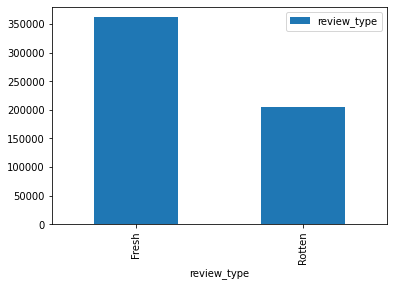

In [ ]:
grouped = review_df_clean.groupby(['review_type'])
grouped[['review_type']].count().plot(kind = 'bar')

##Text Analysis

Our three corpuses are review_corpus, fresh_corpus, rotten_corpus. We also have rotten_list and fresh_list. I'm going to comment what I am trying to do

In [ ]:
import nltk 

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer 

import nltk 
nltk.download("punkt")

from nltk.tokenize import word_tokenize

print(len(fresh_corpus))
print(len(rotten_corpus))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
361955
205488


In [ ]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')
import string 
stopwords_en.extend(string.punctuation)
contraction_list = ["'s", "n't", "'ve", "'m"]
stopwords_en.extend(contraction_list)
punctuation_list = ["''", "...", "``" ,"-", "_", "—", "—", "--"]
stopwords_en.extend(punctuation_list)

In [ ]:
review_no_stop = []
for w in review_list:
  if w.lower() not in stopwords_en:
    review_no_stop.append(w.lower())

In [ ]:
fresh_no_stop = []
for w in fresh_list:
  if w.lower() not in stopwords_en:
    fresh_no_stop.append(w.lower())

In [ ]:
rotten_no_stop = []
for w in rotten_list:
  if w.lower() not in stopwords_en:
    rotten_no_stop.append(w.lower())

Frequency Distribution Plots - This shows the most frequent words across fresh and rotten reviews. We see a lot of the same words with some exceptions ("good" and "bad" for example)

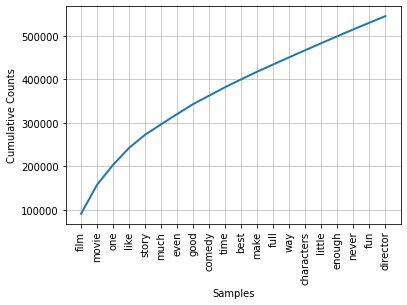

In [ ]:
from nltk import FreqDist
fdistrev = FreqDist(review_no_stop)
fdistrev
fdistrev.plot(20, cumulative=True)

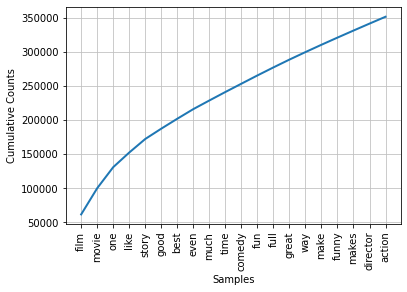

In [ ]:
## obviously remove a bunch of stopwords and punctuation we don't care about first but otherwise this will work - it's not removing stop words
from nltk import FreqDist
fdistfresh = FreqDist(fresh_no_stop)
fdistfresh 
fdistfresh.plot(20, cumulative=True)

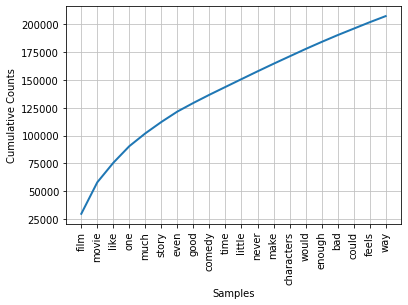

In [ ]:
from nltk import FreqDist
fdistrot = FreqDist(rotten_no_stop)
fdistrot
fdistrot.plot(20, cumulative=True)

Lexical Diversity which represents what percentage of all of the words are unique words it's hard to compare across corpora if they aren't the same length as long texts end up using more very common words. I think this works.

In [ ]:
def lexical_diversity(corpus):
  result = len(set(corpus))/len(corpus)
  return result

print(lexical_diversity(review_list))
print(lexical_diversity(fresh_list))
print(lexical_diversity(rotten_list))

0.012470273732084761
0.014947374442220326
0.02132560674216386


Analyzing how similar words are used in rotten verses fresh comments. Does not work. Error is 'list' object has no attribute 'similar'. This is a very common repeated error which I cannot figure out how to change. 

In [ ]:
revnltk = nltk.Text(review_list[0:25000]) # look at first 25000 tokens so we can run it, otherwise it takes way too long
freshnltk = nltk.Text(fresh_list[0:25000])
rotnltk = nltk.Text(rotten_list[0:25000]) 

In [ ]:
revnltk.similar("film")
print("\n")
freshnltk.similar("film")
print("\n")
rotnltk.similar("film")

movie gates story comedy picture audience time characters plot script
humor sequel actors formula cast year is western all masterpiece


movie story comedy is drama picture time world treat production
characters humor acting original bit script result actors heart
message


movie story script comedy audience kid role screen end sequel original
acting picture gates structure guy entire brothers and one


In [ ]:
revnltk.similar("story")
print("\n")
freshnltk.similar("story")
print("\n")
rotnltk.similar("story")

film movie humor picture audience time script premise comedy result
way role sort top kind formula heart cast rest gates


movie film picture cast comedy result way kind heart tale screen sort
gates brothers century passion mind face world are


film movie audience plot script end role suspense time theory way
acting comedy formula rest premise structure this most kid


In [ ]:
freshnltk.similar("good")
print("\n")
rotnltk.similar("good")

grand often a much true hitchcock love single well simple bond light
thrilling buddy mainstream right terrific wonderful family funny


bad right funny long idea much time less gimmick mysterious title
characters love clever road dumb real timely shabby truth


In [ ]:
freshnltk.similar("bad")
print("\n")
rotnltk.similar("bad")

quality tremendous devastating better major terrific family
contemporary period great remarkable nasty winning quiet controlled
hypnotic french


good funny the script are that much share time eloquence film their
quite more less original place mysterious theory story


In [ ]:
revnltk.similar("comedy")
print("\n")
freshnltk.similar("comedy")
print("\n")
rotnltk.similar("comedy")

movie film story script formula picture for but masterpiece dialogue
and production cinematography birds plot storytelling balance humor
action acting


movie film story drama picture game ending for time dialogue hitchcock
love dance treat man performance production birds whole characters


movie film script role story this plot spy kid boy result balance
focus sequel howler avengers acting scene formula lot


In [ ]:
revnltk.similar("characters")
print("\n")
freshnltk.similar("characters")
print("\n")
rotnltk.similar("characters")

film movie western best music story performances bad own kids idea
humor end original zemeckis fact tension blood eloquence stuff


film actors jokes fun first mind all always time best hitchcock love
dance performances own kids humor suspense end original


idea time gates pussycats to good script eloquence film end original
gimmick stars same place three theory kind title images


In [ ]:
revnltk.similar("actors")
print("\n")
freshnltk.similar("actors")
print("\n")
rotnltk.similar("actors")

film all time and on good story suspense role gimmick picture message
particularly clothes audience job gag weaknesses effort truth


film characters movie you all time are story performances suspense
concept minutes script picture pathos jokes message images
particularly clothes


movie movies best kids cia


In [ ]:
revnltk.similar("director")
print("\n")
freshnltk.similar("director")
print("\n")
rotnltk.similar("director")

what movie film time performances right stuff picture pleasure tear
cast reminder throughout prick credit companion return snap


what film treat right thrill pleasure tear lot need trip credit
tribute return compliment snap tunnels caliber shock marvel missile


performances man dog after genius


Analyzing Common Contexts of Words in Fresh verses Rotten. Does not work. Error is 'list' object has no attribute 'similar'. This is a very common repeated error which I cannot figure out how to change. 

In [ ]:
revnltk.common_contexts(['film','movie'])
print("\n")
freshnltk.common_contexts(['film','movie'])
print("\n")
rotnltk.common_contexts(['film','movie'])

the_in a_that the_is this_is the_just a_to a_made the_never the_does
the_seagal this_a a_for this_was


the_is a_that this_is the_a a_of the_does the_seagal this_a a_a
the_would a_with the_works a_about


the_in a_that the_is the_seems the_just a_made the_never this_is
this_was the_does this_does the_itself the_looks


In [ ]:
revnltk.common_contexts(['film','story'])
print("\n")
freshnltk.common_contexts(['film','story'])
print("\n")
rotnltk.common_contexts(['film','story'])

a_that the_is the_a the_and


the_is a_that the_a a_which


a_that the_is the_a the_never the_more the_and


In [ ]:
revnltk.common_contexts(['movie','story'])
print("\n")
freshnltk.common_contexts(['movie','story'])
print("\n")
rotnltk.common_contexts(['movie','story'])

the_is a_that the_has


the_is a_that the_has the_a


the_is a_that the_never the_to a_in


In [ ]:
revnltk.concordance("very")
print("\n")
freshnltk.concordance("very")
print("\n")
rotnltk.concordance("very")

Displaying 25 of 31 matches:
. Corman 's adaptation was shot on a very low budget which shows in the overal
briskly along . The movie never gets very serious and yet you care about the c
ue with the concept . Octopussy is a very minor entry in the Bond franchise . 
ise . The last 15 minutes or so is a very satisfying bit of horror cinema . Cr
here is rings false and despite some very watchable performances , especially 
 up by Howard with a steady , if not very imaginative , hand . It chronicles o
 , mainstream Hollywood comedy about very modern homosexuality . Nearly everyt
es . All in all a remarkable and yet very uneven film . All in all a remarkabl
lm . All in all a remarkable and yet very uneven film . The remaining battle s
ilers and TV ads , it 's actually so very much worse even than that . A rollic
ilers and TV ads , it 's actually so very much worse even than that . We in th
ediocrity . There is nothing in this very slight road movie ... that remotely 
more of this kind of wo

Dispersion Plot
- Since we sorted the data by date, this can give us an idea of if certain words are used more now than they were in 2000

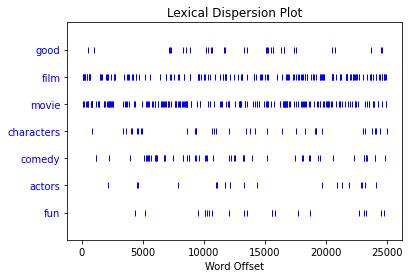

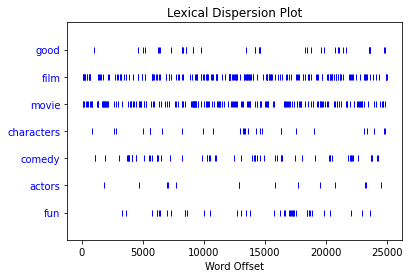

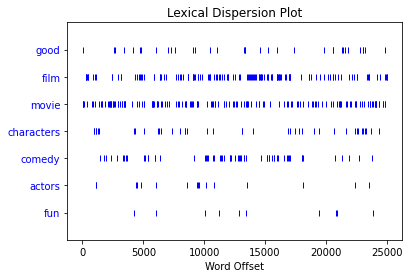

In [ ]:
revnltk.dispersion_plot(['good', 'film', 'movie', 'characters', 'comedy', 'actors', 'fun'])
freshnltk.dispersion_plot(['good', 'film', 'movie', 'characters', 'comedy', 'actors', 'fun'])
rotnltk.dispersion_plot(['good', 'film', 'movie', 'characters', 'comedy','actors', 'fun'])

In [ ]:
revnltk.collocations()

See Spot; Spot Run; Blow Dry; World War; Full Monty; Company Man; Exit
Wounds; two hours; David Arquette; Private Ryan; Saving Private; High
Fidelity; first time; del año; could n't; Stephen Frears; box office;
directorial debut; Peter Askin; credits roll


In [ ]:
freshnltk.collocations()

Spy Kids; special effects; feel like; Spot Run; ever made; See Spot;
romantic comedy; World War; Along Came; Inspector Gadget; directorial
debut; two hours; emotional immediacy; first time; Crouching Tiger;
Hidden Dragon; Private Ryan; credits roll; worth seeing; Amores Perros


In [ ]:
rotnltk.collocations()

Spot Run; See Spot; Blow Dry; Someone Like; Along Came; Joe Dirt; two
hours; Company Man; Full Monty; Farrelly Brothers; Kingdom Come; World
War; Farrelly brothers; Julia Roberts; Ashley Judd; Exit Wounds;
naughty roots; pretty much; worked better; gross-out humor


##TF-IDF

In [ ]:
 !pip install nltk scipy numpy matplotlib scikit-learn gensim 

In [ ]:
review_df_clean_sample = review_df_clean.sample(25000)
# the colab session crashes if we try to use the full dataset so we sample 25000 reviews before recreating the corpora.

review_corpus_sample = review_df_clean_sample['tok']

rotten_df_sample = review_df_clean_sample[review_df_clean_sample['review_type'] == 'Rotten']
rotten_corpus_sample = rotten_df_sample['tok']
rotten_list_sample = [item for sublist in rotten_corpus_sample for item in sublist]

fresh_df_sample = review_df_clean_sample[review_df_clean_sample['review_type'] == 'Fresh']
fresh_corpus_sample = fresh_df_sample['tok']
fresh_list_sample = [item for sublist in fresh_corpus_sample for item in sublist]



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

In [ ]:
vectorizer = CountVectorizer(lowercase=True, tokenizer=nltk.word_tokenize, max_features=1000)

In [ ]:
# count vectorizer expects each document to be one string, not a list of tokens
corpus_concat_fresh = [' '.join(doc) for doc in fresh_corpus_sample]

X = vectorizer.fit_transform(corpus_concat_fresh) 

print(X.shape)

(15878, 1000)


In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
import numpy as np 
import pandas as pd 

def tfidf_vectorizer(corpus):
  cvect = CountVectorizer() 
  count_matrix = cvect.fit_transform(corpus) 
  features = cvect.get_feature_names_out()

  count_matrix = pd.DataFrame(count_matrix.todense()) 

  df_vect = count_matrix.astype(bool).sum(axis=0) 
  df_vect = np.log(len(corpus) / df_vect) 

  return features, np.array(count_matrix * df_vect) 


features, X = tfidf_vectorizer(corpus_concat_fresh)
print(X.shape)

(15878, 24787)


In [ ]:
tokens = vectorizer.get_feature_names_out() 

# build our idx_to_token dictionary
idx_to_tokens = {}
tokens_to_idx = {}

for i in range(len(features)):
  token = features[i] 
  tokens_to_idx[token] = i 
  idx_to_tokens[i] = token 


22073
[0.         0.         0.4433314  ... 0.4433314  1.32999421 0.        ]


In [ ]:
top_fresh_tokens = np.argsort(X[0])[::-1]
top_fresh_tokens = top_fresh_tokens[0:10]
print(top_fresh_tokens)
for t in top_fresh_tokens:
  print(idx_to_tokens[t])

[  236 10478  5708  2822  8176 21555 17294 14102 14605  9905]
99
holding
delicious
breath
felt
suspense
pure
minutes
my
had


In [ ]:
corpus_concat_rotten = [' '.join(doc) for doc in rotten_corpus_sample]

X = vectorizer.fit_transform(corpus_concat_rotten) 

print(X.shape)

(9122, 1000)


In [ ]:
features, X = tfidf_vectorizer(corpus_concat_rotten)
print(X.shape)



(9122, 19246)


In [ ]:
tokens = vectorizer.get_feature_names_out() 

# build our idx_to_token dictionary
idx_to_tokens = {}
tokens_to_idx = {}

for i in range(len(features)):
  token = features[i] 
  tokens_to_idx[token] = i 
  idx_to_tokens[i] = token 

the_id = tokens_to_idx["the"]
print(the_id)
print(X[:,the_id])

17187
[0.91985046 0.91985046 0.45992523 ... 0.         0.         0.        ]


In [ ]:
top_rotten_tokens = np.argsort(X[0])[::-1]
top_rotten_tokens = top_rotten_tokens[0:10]
print(top_rotten_tokens)
for t in top_rotten_tokens:
  print(idx_to_tokens[t])

[ 3750  1186  4421 11435  2817 17454 14695 17655 18874  9396]
courant
au
deranged
nihilistic
cheek
tongue
savage
trend
wild
killer


##LDA

In [ ]:
rotten_corpus = rotten_df['review_content']

18385     Why did and does Hollywood continue to put non...
23652     What little plot there is to this movie is bas...
622026    Octopussy is a very minor entry in the Bond fr...
651732    Although there are plenty of elements to choos...
257544    It's probably safe to say that the British dir...
                                ...                        
569698    At no point do Jerry and Samantha seem romanti...
417839    The bits are more sitcom quality than the Wood...
775836      No bows -- no wows See Spot Run is a must miss.
569700    It's tough to believe anyone could read this s...
775837    Too dumb for anyone over 8 and too vulgar for ...
Name: review_content, Length: 100, dtype: object

In [ ]:
fresh_corpus = fresh_df['review_content']

898262    Sunrise is often rightfully noted for its tech...
898263    Sunrise is often rightfully noted for its tech...
644470    When one speaks of The Passion of Joan of Arc,...
545                             If you haven't seen it, do.
26977     The Western that, more than any other film, se...
                                ...                        
141491    It chronicles one of the most dramatic of all ...
606975    As an actress, Bullock has it all -- heart and...
34170     There are moments in A Little Princess when yo...
139917    Antonia's Line lopes along, sometimes with slo...
181974    The beauty of The Birdcage is that its jokes a...
Name: review_content, Length: 100, dtype: object

In [ ]:
import nltk 

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer 

import nltk 
nltk.download("punkt")

from nltk.tokenize import word_tokenize

print(len(fresh_corpus))
print(len(rotten_corpus))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
361955
205488


In [ ]:
#Loading and fitting the "fresh" model

cvect = CountVectorizer(stop_words="english", max_features=500)
X = cvect.fit_transform(fresh_corpus)

vocab = cvect.get_feature_names() 
print(vocab[0:10])
print(vocab[20:30])

['act', 'acted', 'acting', 'action', 'actor', 'actors', 'actually', 'adaptation', 'adventure', 'age']
['audience', 'audiences', 'away', 'bad', 'based', 'beautiful', 'beautifully', 'beauty', 'best', 'better']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Fitting the topic model for "Fresh"

NUM_TOPICS = 5

# initialize the topic model
topic_model = LatentDirichletAllocation(n_components=NUM_TOPICS, #n_compenents specifies the number of topics
                                        n_jobs=2,
                                        learning_method='online',
                                        evaluate_every=0)  
topic_model.fit(X) 

LatentDirichletAllocation(evaluate_every=0, learning_method='online',
                          n_components=5, n_jobs=2)

In [ ]:
TOP_N = 5 

topic_norm = topic_model.components_ / topic_model.components_.sum(axis=1)[:, np.newaxis]

for idx, topic in enumerate(topic_norm):
    print("Topic id: {}".format(idx))
    #print(topic)
    top_tokens = np.argsort(topic)[::-1] 
    for i in range(TOP_N):
        print('{}: {}'.format(vocab[top_tokens[i]], topic[top_tokens[i]]))
    print()

#for each topic in the "Fresh" reviews, we get the top 5 words

#NEED TO FIGURE OUT HOW TO DROP 'movie' and 'film' from these models!

Topic id: 0
film: 0.046828650967773014
best: 0.04117315423067275
review: 0.03884510012916587
great: 0.032459850436507
make: 0.03022555239632764

Topic id: 1
story: 0.0620663180143859
good: 0.04639331808127038
characters: 0.028266949551180122
performance: 0.027038880526652247
drama: 0.026299239413667356

Topic id: 2
film: 0.07513290282252776
funny: 0.03411358896304842
entertaining: 0.030582995004973877
real: 0.023567697496127152
documentary: 0.021460291992912855

Topic id: 3
like: 0.07221255512930022
movie: 0.04417897107655456
film: 0.04229424509332197
makes: 0.03427343983357372
love: 0.031300208137938774

Topic id: 4
time: 0.03867750167204925
film: 0.0378115978176892
spanish: 0.035585726621418345
fun: 0.034482815095377845
life: 0.032068133613185855



In [ ]:
#Loading and fitting the "rotten" model

cvect = CountVectorizer(stop_words="english", max_features=500)
X2 = cvect.fit_transform(rotten_corpus)

vocab2 = cvect.get_feature_names() 
print(vocab2[0:10])
print(vocab2[20:30])

['act', 'acting', 'action', 'actor', 'actors', 'actually', 'adaptation', 'adventure', 'age', 'american']
['audience', 'audiences', 'away', 'awful', 'bad', 'barely', 'based', 'believe', 'best', 'better']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Fitting the topic model for "Rotten"

NUM_TOPICS = 5


# initialize the topic model
topic_model = LatentDirichletAllocation(n_components=NUM_TOPICS, #n_compenents specifies the number of topics
                                        n_jobs=2,
                                        learning_method='online',
                                        evaluate_every=0)  
topic_model.fit(X2) 

LatentDirichletAllocation(evaluate_every=0, learning_method='online',
                          n_components=5, n_jobs=2)

In [ ]:
import numpy as np

TOP_N = 5

topic_norm = topic_model.components_ / topic_model.components_.sum(axis=1)[:, np.newaxis]

for idx, topic in enumerate(topic_norm):
    print("Topic id: {}".format(idx))
    #print(topic)
    top_tokens = np.argsort(topic)[::-1] 
    for i in range(TOP_N):
        print('{}: {}'.format(vocab[top_tokens[i]], topic[top_tokens[i]]))
    print()

#for each topic in the "Rotten" reviews, we get the top 5 words

Topic id: 0
narrative: 0.07110473795356534
film: 0.04690076812457674
like: 0.04115873482559599
remarkable: 0.030511485719776084
early: 0.0261362339231967

Topic id: 1
comedy: 0.047817808019086805
better: 0.03541823965455867
acting: 0.02832468920217958
features: 0.02409847861873203
future: 0.022894492510285133

Topic id: 2
magic: 0.041090663213011934
narrative: 0.04044143354084498
rock: 0.03437775394992866
documentary: 0.03396282293752872
impressive: 0.03316418545404401

Topic id: 3
narrative: 0.04493355632690455
film: 0.04256842755864765
easily: 0.03809709421555138
study: 0.030585625253150384
based: 0.028261957818906374

Topic id: 4
level: 0.09234412888787911
film: 0.0749630117598468
fi: 0.03447622868998382
left: 0.02065716173837001
feels: 0.0204001217090655



##Sentiment Analysis

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
review_text = review_df_clean['review_content']
data_labels = review_df_clean['review_type']

# split into train/test data
training_text, test_text, training_labels, test_labels = train_test_split(review_text, data_labels, 
                                                                        train_size = 0.7)

In [ ]:
# learning-based model
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# the input for our classifier is a term-frequency matrix
vect = CountVectorizer()
X = vect.fit_transform(training_text) 

# encode our labels as 0 and 1 (0 = Fresh, 1 = Rotten)
label_enc = LabelEncoder()
Y = label_enc.fit_transform(training_labels) 
print(label_enc.classes_) #print our 2 classes, Fresh and Rotten

nb = MultinomialNB() # initialize the model

nb.fit(X, Y) # training the model (this function does all of the heavy lifting) 

['Fresh' 'Rotten']


MultinomialNB()

In [ ]:
# test set evaluation for Naive Bayes 
X_test = vect.transform(test_text)
Y_test = label_enc.transform(test_labels)

preds = nb.predict(X_test) # our predictions for the test data

print('test accuracy: {}'.format(np.sum(preds == Y_test) / len(Y_test))) # accuracy is how many we get right/total


test accuracy: 0.8035503238311351
Predicted label: 0, true label: 0, review: Nearly everything about Rabbit-Proof Fence is astonishing.
Predicted label: 0, true label: 0, review: Extraordinarily rich visually, with a density of detail that would have impressed Breughel or Veronese.
Predicted label: 0, true label: 0, review: [An] authoritative British documentary on [King's] long, impressive career.
Predicted label: 0, true label: 0, review: Directors Kevin Kölsch and Dennis Widmyer capture the dark, grieving spirit of what many regard as King's scariest work.
Predicted label: 1, true label: 0, review: 47 Meters Down: Uncaged may be a bit slight in the script department and features some cartoonish aquatic beasts, but it delivers non-stop, anxiety-inducing terror once it reaches its halfway point.
Predicted label: 1, true label: 0, review: If there is a visual equivalent to that title song - the Billie Holiday version is favored here - Kiarostami seems to have found it.
Predicted label:

Rule Based version, using Vader lexicon

In [ ]:
## rule based version:

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download("vader_lexicon")

sid = SentimentIntensityAnalyzer() # initialize our rules-based model


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# test set evaluation for VADER
test_preds = []
# even though we don't have any training portion of this model, we'll use the same data as we used for the learning model
# we'll do this 1) for consistency and 2) since the size of the data (even 30%) is plenty to remove any serious sampling bias anyway
for t in test_text:
  ss = sid.polarity_scores(t)
  score = ss['compound']
  if score > 0:
    test_preds.append("Fresh")  # positive
  else:
    test_preds.append("Rotten")  # negative 

print('test accuracy: {}'.format(np.sum(test_preds == test_labels) / len(test_labels)))

test accuracy: 0.637531994786285
-------
